In [1]:
# Bibliotecas

import numpy as np
import pandas as pd

# Libs para análises gráficas

import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos

import warnings

# Desativar avisos

warnings.filterwarnings("ignore")


In [3]:
# Lendo base de dados
base_dados = pd.read_csv("Dados_Indendio.csv", encoding="latin-1")

#verificando
base_dados.head(11)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [4]:
# Verificando tipo de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [5]:
# Nulos
base_dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<Axes: title={'center': 'Análise de Campos Nulos'}>

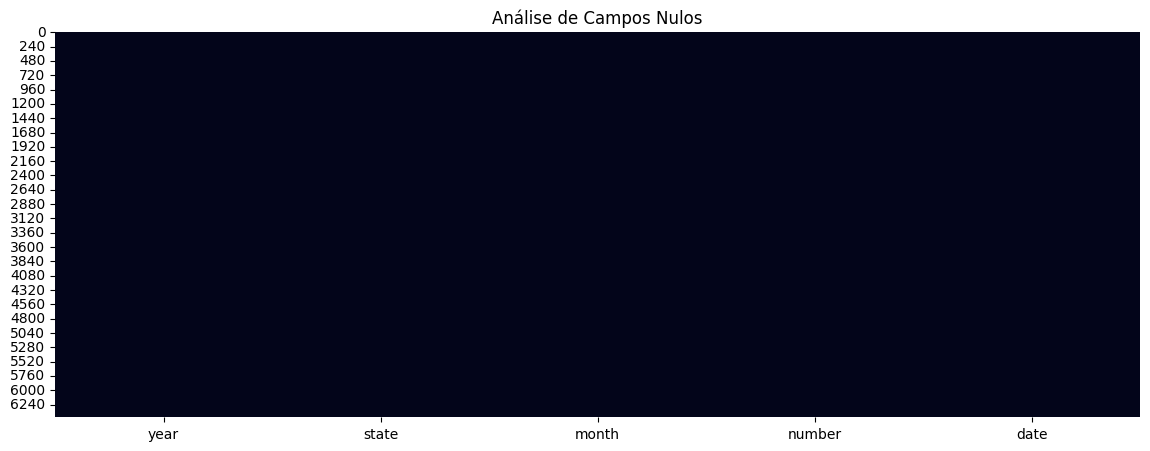

In [6]:
# Em gráfico de nulos
plt.figure(figsize=(14,5))
plt.title("Análise de Campos Nulos")
sns.heatmap(base_dados.isnull(), cbar=False)

In [7]:
# Estatísticas
base_dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [8]:
# Campos únicos
base_dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [11]:
# Análise por ano dos incencios
analise = base_dados.groupby(by=["year"]).sum().reset_index()

analise.head(11)

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


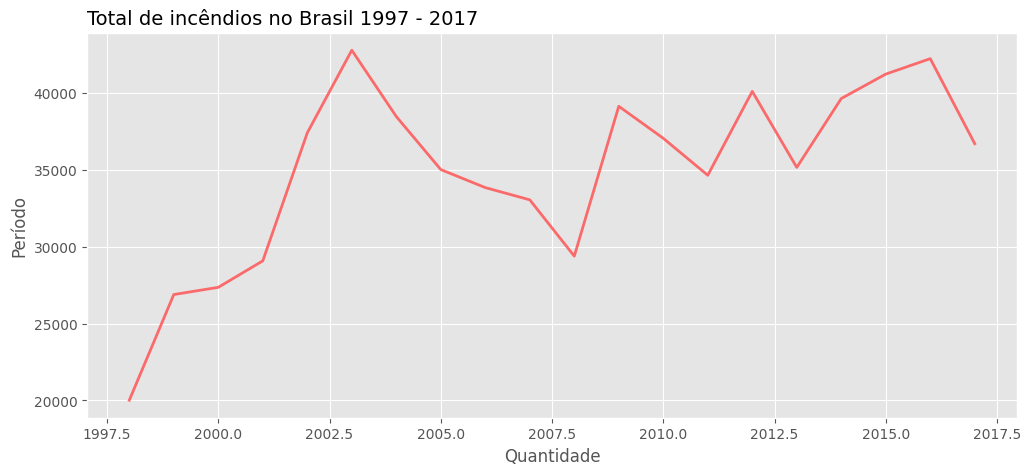

In [15]:
# Tamanho
plt.figure(figsize=(12,5))

# Style
plt.style.use("ggplot")

# Gráfico
plt.title("Total de incêndios no Brasil 1997 - 2017", loc="left", fontsize=14)
sns.lineplot(data=analise, x="year", y="number", estimator="sum", lw=2, color="#ff5555", alpha=0.85);


# Labels
plt.xlabel("Quantidade")
plt.ylabel("Período");

In [17]:
# Análise pelos meses
analise2 = base_dados.groupby(by=["year", "month"]).sum().reset_index()

analise2

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000
...,...,...,...
234,2017,Maio,2506.000
235,2017,Março,2017.000
236,2017,Novembro,6217.379
237,2017,Outubro,3600.159


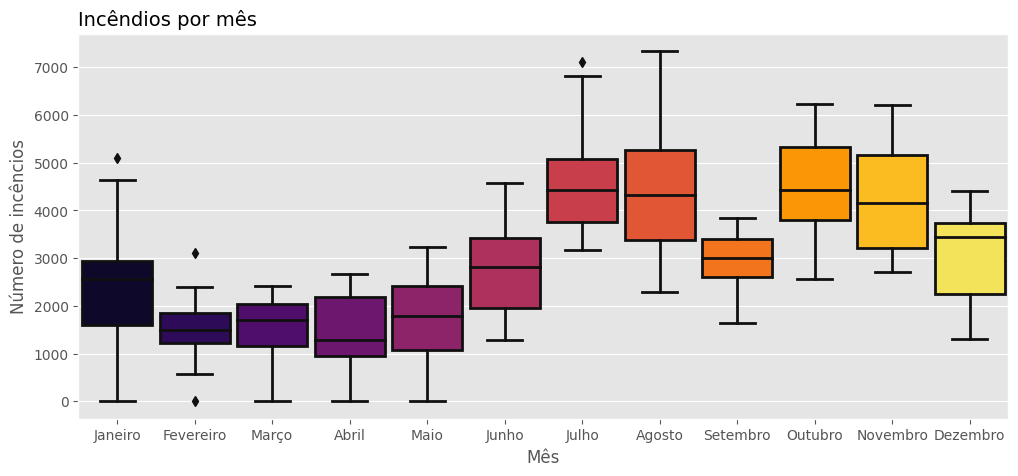

In [23]:
# Tamanho
plt.figure(figsize=(12,5))

# Gráfico
plt.title("Incêndios por mês", loc="left", fontsize=14)
sns.boxplot(data=analise2, x="month", y="number", palette="inferno", saturation=1, width=0.9, linewidth=2,
            order=["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]);

# Labels
plt.xlabel("Mês")
plt.ylabel("Número de incêncios");


In [26]:
# Análise por estados
analise3 = base_dados.groupby(by=["state"]).sum().reset_index()[["state", "number"]].sort_values("number", ascending=False)
analise3.head(11)

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


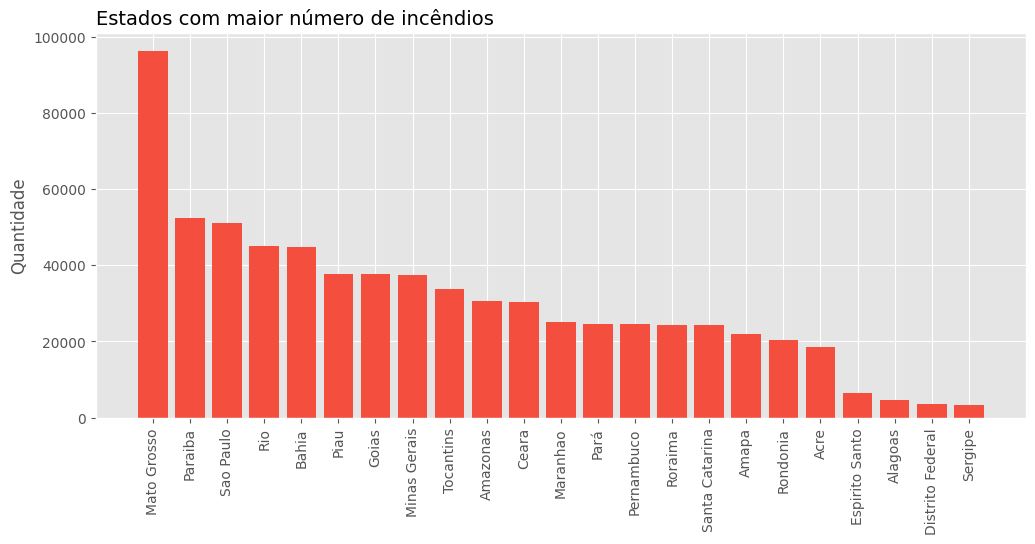

In [30]:
# Gráfico

#Tamanho
plt.figure(figsize=(12,5))

# Título
plt.title("Estados com maior número de incêndios", loc="left", fontsize=14)

plt.bar(analise3.state, analise3["number"], color="#f44e3f")

# Labels
plt.ylabel("Quantidade");
plt.xticks(rotation=90);

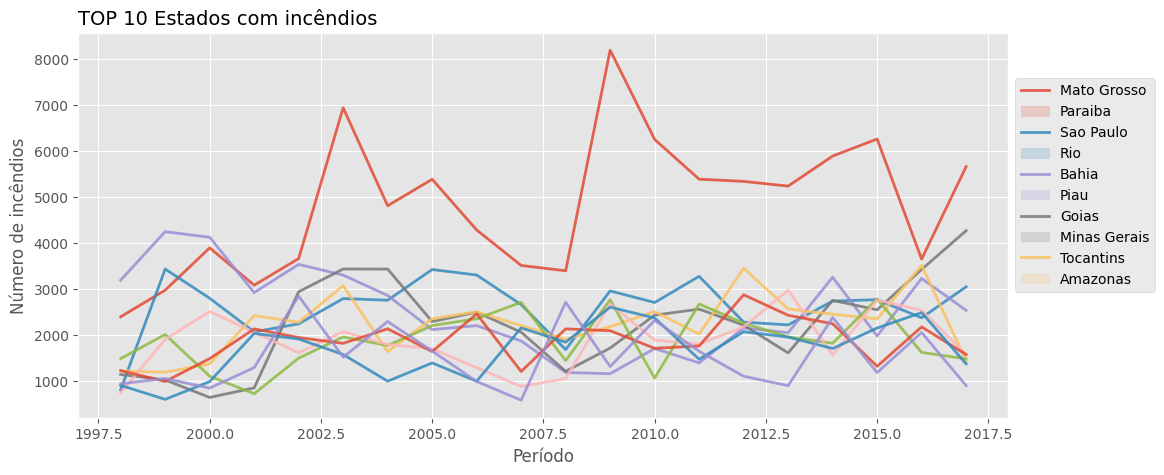

In [39]:
# Estados TOP 10
lista_top10 = analise3["state"][0:10].values

# Tamanho
plt.figure(figsize=(12,5))

# Título
plt.title("TOP 10 Estados com incêndios", loc="left", fontsize=14)

# Loop
for coluna in lista_top10:

  # Filtrar os estados
  filtro = base_dados.loc[base_dados["state"]==coluna]

  # Agrupar os valores para somar
  analise_local = filtro.groupby(by=["year"]).sum().reset_index()

  # Plot
  sns.lineplot(data=analise_local, x="year", y="number", lw=2, alpha=0.85)

# Labels
plt.xlabel("Período")
plt.ylabel("Número de incêndios");

# Legend
plt.legend(lista_top10, bbox_to_anchor=(1, 0.9));

In [41]:
# Plot Geográfico

# Gerando os estados
Estados = analise3.sort_values('state')['state'].values

# Gerando os valores
Valores = analise3.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [42]:
# Fazendo o plot
import plotly.express as px

# Mapa de Calor Geográfico
px.density_mapbox(
    Analise_Geografica,
    lat="Latitude",
    lon="Longitude",
    z="Incêndios",
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style="stamen-terrain"
)